# Loading Custom Modules

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
sys.path.append('C:/Users/hkimr/Desktop/RPS Project/RPS-Deep-Learning/modules')

from DataLoaders import *
from Visualizations import *
from TrainTest import *
from MakeDataset import *

# Creating Custom Dataset

In [2]:
print("Creating Training Set")
createDataSet("train")
print("Creating Validation Set")
createDataSet("val")
print("Creating Testing Set")
createDataSet("test")

Creating Training Set
Type 'y' to begin recording rock examples: y
Saving images and adding augmentation...
Type 'y' to begin recording paper examples: y
Saving images and adding augmentation...
Type 'y' to begin recording scissors examples: y
Saving images and adding augmentation...
Creating Validation Set
Type 'y' to begin recording rock examples: y
Saving images and adding augmentation...
Type 'y' to begin recording paper examples: y
Saving images and adding augmentation...
Type 'y' to begin recording scissors examples: y
Saving images and adding augmentation...
Creating Testing Set
Type 'y' to begin recording rock examples: y
Saving images and adding augmentation...
Type 'y' to begin recording paper examples: y
Saving images and adding augmentation...
Type 'y' to begin recording scissors examples: y
Saving images and adding augmentation...


# Defining DataLoaders

## Hyperparameters

In [3]:
batch_size = 150
learning_rate = 0.001
n_epochs = 16
output_neurons = 3
regularization = 0.001
model_name = "Improving_Large_Dataset_Ideal"

In [5]:
train_transform = defineDataTransform("train")
val_transform = defineDataTransform("val")
test_transform = defineDataTransform("test")

train_loader = createDataLoader("data/rps-train", train_transform, batch_size = batch_size)
val_loader = createDataLoader("data/rps-val", val_transform, batch_size = batch_size)
test_loader = createDataLoader("data/rps-test", test_transform, test_loader = True)

## Example Image From Dataset

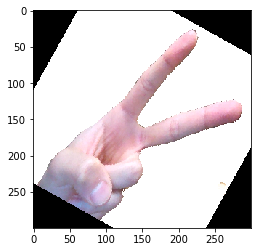

In [6]:
showNumpyAsImg(next(iter(train_loader))[0][0])

# Defining Network Architecture

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 15)
        self.conv2 = nn.Conv2d(6, 16, 15)
        self.pool = nn.MaxPool2d(5, 5)
        
        self.fc1 = nn.Linear(16*8*8, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, output_neurons)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16*8*8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

# Training The Network

In [8]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = regularization)
trainNetwork(model, train_loader, val_loader, n_epochs, optimizer)

Epoch 1, Loss: 11.015, Validation Loss 3.283
Epoch 2, Loss: 10.522, Validation Loss 2.891
Epoch 3, Loss: 9.623, Validation Loss 2.951
Epoch 4, Loss: 6.270, Validation Loss 2.491
Epoch 5, Loss: 6.530, Validation Loss 1.180
Epoch 6, Loss: 1.117, Validation Loss 3.837
Epoch 7, Loss: 0.560, Validation Loss 1.673
Epoch 8, Loss: 0.280, Validation Loss 2.114
Epoch 9, Loss: 0.111, Validation Loss 2.665
Epoch 10, Loss: 0.124, Validation Loss 3.208
Epoch 11, Loss: 0.082, Validation Loss 2.757
Epoch 12, Loss: 0.073, Validation Loss 2.836
Epoch 13, Loss: 0.092, Validation Loss 2.847
Epoch 14, Loss: 0.058, Validation Loss 3.396
Epoch 15, Loss: 0.096, Validation Loss 3.457
Epoch 16, Loss: 0.063, Validation Loss 3.375


# Saving The Model

In [9]:
torch.save(model.state_dict(), f'saved_models/{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')

# Evaluating The Model

In [12]:
model = CNN()
loadModel(model, f'{model_name}_{batch_size}BS_{learning_rate}LR_{n_epochs}E')
evaluateNetwork(model, test_loader)

[[148   0   2]
 [  6 143   1]
 [  8   7 135]]
              precision    recall  f1-score   support

           0    0.91358   0.98667   0.94872       150
           1    0.95333   0.95333   0.95333       150
           2    0.97826   0.90000   0.93750       150

    accuracy                        0.94667       450
   macro avg    0.94839   0.94667   0.94652       450
weighted avg    0.94839   0.94667   0.94652       450

